# Jamaican House Price Prediction Model: 

## My goal is to accurately predict house prices based on no. bedrooms, no. bathrooms, location and size.

In [6]:
#import libraries from requirements file


#### Load data:

In [7]:
#read csv file
df = pd.read_csv('alllistings - sold.csv')
df.head(20)

Address    SQFT    Price      Parish  Region    BR  \
0      LOT 206, 12 DEWDNEY ROAD  4363.0  1350000    Kingston      14   3.0   
1            454 WATERHOUSE PEN   631.0  2300000  St. Andrew      11   2.0   
2                 ANDERSON ROAD  1500.0  3000000    Kingston       4   2.0   
3                BURGHER AVENUE  1350.0  2500000    Kingston       2   3.0   
4            2 JACQUES CRESCENT  5080.0  3000000    Kingston       4  12.0   
5                  TOWER AVENUE   858.0  2500000  St. Andrew      11   2.0   
6             41 RUSHWORTH PATH   690.0  3000000  St. Andrew      11   1.0   
7   1285 SEAVIEW GARDENS PH....  2500.0  2500000  St. Andrew      11   3.0   
8              MYRRH VILLA ROAD   800.0  3200000    Kingston      14   1.0   
9             21 MCDONALD LANE,  5943.0  3300000  St. Andrew      13   3.0   
10            OLEANDER CRESCENT  2340.0  3500000  St. Andrew      11   4.0   
11           27 CHISHOLM AVENUE   800.0  4000000  St. Andrew      13   2.0   
12            1B UPPER IVY ROAD  2200.0  4000000  St. Andrew       5   5.0   
13             3 GRANTS PEN AVE   583.0  3500000  St. Andrew       8   2.0   
14               28 ARNOLD ROAD     NaN  5000000    Kingston       1   2.0   
15                   TOTLEY AVE  3000.0  4500000  St. Andrew      10   6.0   
16            TOWER HILL AVENUE   800.0  4500000    Kingston      14   2.0   
17           40 DAFFODIL AVENUE   432.0  5000000  St. Andrew      13   3.0   
18       114A RUMLANE, DOWNTOWN  3497.0  4650000    Kingston       1  14.0   
19               14 BROOKS PATH  1001.0  5000000  St. Andrew       3   3.0   

    BTH  
0   1.0  
1   2.0  
2   1.0  
3   1.0  
4   4.0  
5   1.0  
6   1.0  
7   1.0  
8   3.0  
9   1.0  
10  3.0  
11  1.0  
12  2.0  
13  1.0  
14  2.0  
15  3.0  
16  1.0  
17  1.0  
18  3.0  
19  1.0

#### Clean data:

In [8]:
#dropping listings without number of bedrooms or bathrooms
df = df.dropna(how='any')
df

Address     SQFT      Price      Parish  Region    BR  \
0     LOT 206, 12 DEWDNEY ROAD   4363.0    1350000    Kingston      14   3.0   
1           454 WATERHOUSE PEN    631.0    2300000  St. Andrew      11   2.0   
2                ANDERSON ROAD   1500.0    3000000    Kingston       4   2.0   
3               BURGHER AVENUE   1350.0    2500000    Kingston       2   3.0   
4           2 JACQUES CRESCENT   5080.0    3000000    Kingston       4  12.0   
...                        ...      ...        ...         ...     ...   ...   
1213                  OAKRIDGE  12000.0  186354795  St. Andrew       8   7.0   
1214            32 EARLS COURT   5500.0  202362542  St. Andrew       8   4.0   
1215        3 WILMINGTON DRIVE   7414.0  226948645  St. Andrew       6   4.0   
1216           10 COOKHAM DENE   6000.0  272338374  St. Andrew       6   4.0   
1217           1 MONTROSE ROAD   7000.0  680845935  St. Andrew      10   4.0   

      BTH  
0     1.0  
1     2.0  
2     1.0  
3     1.0  
4     4.0  
...   ...  
1213  7.0  
1214  4.0  
1215  5.0  
1216  8.0  
1217  4.0  

[1182 rows x 7 columns]

In [9]:
#changing Region's data type to a float for modelling
df['Region'] = df['Region'].astype('float')
df

Address     SQFT      Price      Parish  Region    BR  \
0     LOT 206, 12 DEWDNEY ROAD   4363.0    1350000    Kingston    14.0   3.0   
1           454 WATERHOUSE PEN    631.0    2300000  St. Andrew    11.0   2.0   
2                ANDERSON ROAD   1500.0    3000000    Kingston     4.0   2.0   
3               BURGHER AVENUE   1350.0    2500000    Kingston     2.0   3.0   
4           2 JACQUES CRESCENT   5080.0    3000000    Kingston     4.0  12.0   
...                        ...      ...        ...         ...     ...   ...   
1213                  OAKRIDGE  12000.0  186354795  St. Andrew     8.0   7.0   
1214            32 EARLS COURT   5500.0  202362542  St. Andrew     8.0   4.0   
1215        3 WILMINGTON DRIVE   7414.0  226948645  St. Andrew     6.0   4.0   
1216           10 COOKHAM DENE   6000.0  272338374  St. Andrew     6.0   4.0   
1217           1 MONTROSE ROAD   7000.0  680845935  St. Andrew    10.0   4.0   

      BTH  
0     1.0  
1     2.0  
2     1.0  
3     1.0  
4     4.0  
...   ...  
1213  7.0  
1214  4.0  
1215  5.0  
1216  8.0  
1217  4.0  

[1182 rows x 7 columns]

## Now it's time to explore:

In [10]:
#get 5 Number Summary:
df.describe()

SQFT         Price       Region           BR          BTH
count   1182.000000  1.182000e+03  1182.000000  1182.000000  1182.000000
mean    4453.297800  5.740226e+07    12.613367     4.299492     3.287648
std     5881.467554  4.638027e+08     6.094396     1.661941     1.458486
min      200.000000  1.796080e+05     1.000000     1.000000     1.000000
25%     2000.000000  1.450000e+07     8.000000     3.000000     2.000000
50%     3000.000000  2.400000e+07    10.000000     4.000000     3.000000
75%     4521.000000  3.700000e+07    19.000000     5.000000     4.000000
max    88000.000000  9.637752e+09    21.000000    19.000000    17.000000

This shows me that the average house in the Kingston & St.Andrew area is a 4,453 SQFT, 4 bedroom, 3 bathroom propery, located in Kingston 12 and costs JMD 57.4 Million. This is a bit off putting because in reality, houses in that area do not cost that much, so I want to dive a bit deeper to examine the features individually. At first glance, I think the price distribution is very interesting with a standard deviation of JMD 463 Million.

In [11]:
#plot Price:


This isn't what I expected but it definitely verifies my suspicion about the price variable. I think this might also show a high level of right-skewedness.

In [12]:
#sample price variable by using it's 25th and 75th percentiles as benchmarks:
df_price_adjusted = df.query('Price < 57400000')
df_price_adjusted#plt.hist(data=df_price_adjusted, x='Price', bins=10);

Address     SQFT     Price      Parish  Region    BR  \
0     LOT 206, 12 DEWDNEY ROAD   4363.0   1350000    Kingston    14.0   3.0   
1           454 WATERHOUSE PEN    631.0   2300000  St. Andrew    11.0   2.0   
2                ANDERSON ROAD   1500.0   3000000    Kingston     4.0   2.0   
3               BURGHER AVENUE   1350.0   2500000    Kingston     2.0   3.0   
4           2 JACQUES CRESCENT   5080.0   3000000    Kingston     4.0  12.0   
...                        ...      ...       ...         ...     ...   ...   
1117      14 LOWER GREAT HOUSE   8390.0  47000000  St. Andrew     8.0   4.0   
1124          BIRDSUCKER DRIVE  10300.0  57000000  St. Andrew     8.0   5.0   
1133            32 DURIE DRIVE  13600.0  56888460  St. Andrew     8.0   4.0   
1135          NORBROOK HEIGHTS   6850.0  55000000  St. Andrew     8.0   6.0   
1154           RUSSELL HEIGHTS  48364.0  50000000  St. Andrew     8.0   5.0   

      BTH  
0     1.0  
1     2.0  
2     1.0  
3     1.0  
4     4.0  
...   ...  
1117  5.0  
1124  4.0  
1133  3.0  
1135  5.0  
1154  6.0  

[1071 rows x 7 columns]

Much better! This shows a normal distribution with the mode being between 10 and 20 mil. 

In [13]:
#plot square feet:
plt.hist(data=df_price_adjusted, x='SQFT', bins=50);

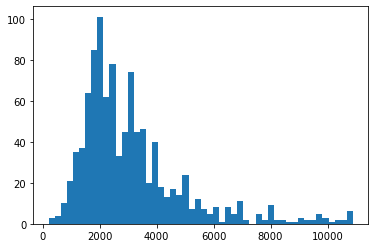

In [14]:
#hammering down on the house with total sqft < 11000 sqft
df_model = df_price_adjusted.query('SQFT < 11000')
plt.hist(data=df_model, x='SQFT', bins=50);

I wanted to see the distribution around the average of 4521 sqft. I would say it also has a normal distribution. df_,odel is what I will be using later on to train my model. 

In [15]:
#plot bedrooms
plt.hist(data=df_model, x='BR');

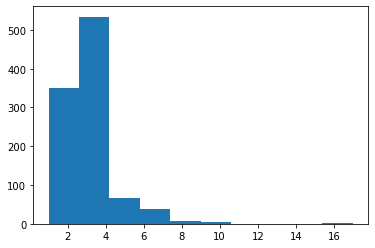

In [16]:
#plot bathrooms
plt.hist(data=df_model, x='BTH');

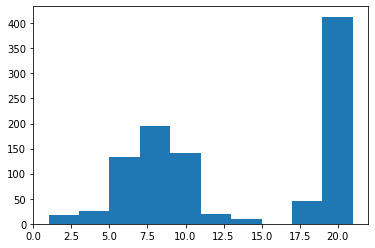

In [17]:
#plot regions
plt.hist(data=df_model, x='Region');

The distribution of regions seems off but that's because there were no listings for some regions in Kingston like Kingston 16.

#### Visualize data:

In [18]:
#plot data to visualize relationships
sb.pairplot(df[['Region', 'BR', 'BTH', 'Price', 'SQFT']]);

The only clear correlations are between the number of bedrooms and bathrooms, and a relationship between them is expected. Next, I will observing the distribution of each feature.

## Time to build the models!

### <strong>I will be trying Linear Regression, Decision Trees and Random Forests to predict house prices. Then, I'll check their accuracies to choose which one can most accurately predict the price of a Jamaican house.</strong>

## Define x and y:

In [19]:
#save the independent variables as x and the dependent variable, Price, as y:
factors = ['Region', 'BR', 'BTH', 'SQFT']
x=df_model[factors].values
y=df_model['Price'].values

In [20]:
#checking each variable:
print(x)
print(y)

[[1.400e+01 3.000e+00 1.000e+00 4.363e+03]
 [1.100e+01 2.000e+00 2.000e+00 6.310e+02]
 [4.000e+00 2.000e+00 1.000e+00 1.500e+03]
 ...
 [8.000e+00 4.000e+00 5.000e+00 8.390e+03]
 [8.000e+00 5.000e+00 4.000e+00 1.030e+04]
 [8.000e+00 6.000e+00 5.000e+00 6.850e+03]]
[ 1350000  2300000  3000000 ... 47000000 57000000 55000000]


In [21]:
#split data into train and test sets:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.3)

### <strong>Linear Regression:</strong>

In [22]:
#get linear regression from, MSE, R-squared and MAE from the sklearn library:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [23]:
#train model:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_price_pred = lr_model.predict(x_test)

In [24]:
#print metrics
print('The Mean Absolute Error is: %.2f'% mean_absolute_error(y_test, lr_price_pred))
print('The Mean Squared Error is: %.2f'% mean_squared_error(y_test, lr_price_pred))
print('The Accuracy is: %.2f'% r2_score(y_test, lr_price_pred))

The Mean Absolute Error is: 8552355.57
The Mean Squared Error is: 122567140013771.64
The Accuracy is: 0.26


### Decision Tree:

In [25]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_leaf_nodes=50)
model.fit(x_train, y_train)
tree_preds = model.predict(x_test)

In [26]:
#print metrics
print('The Mean Absolute Error is: %.2f'% mean_absolute_error(y_test, tree_preds))
print('The Mean Squared Error is: %.2f'% mean_squared_error(y_test, tree_preds))
print('The Accuracy is: %.2f'% r2_score(y_test, tree_preds))

The Mean Absolute Error is: 7372316.15
The Mean Squared Error is: 99716184028565.28
The Accuracy is: 0.40


### Random Forest:

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(x_train, y_train)
forest_preds = forest_model.predict(x_test)

In [29]:
#print metrics
print('The Mean Absolute Error is: %.2f'% mean_absolute_error(y_test, forest_preds))
print('The Mean Squared Error is: %.2f'% mean_squared_error(y_test, forest_preds))
print('The Accuracy is: %.2f'% r2_score(y_test, forest_preds))

The Mean Absolute Error is: 7296621.49
The Mean Squared Error is: 94163441519188.84
The Accuracy is: 0.43


The most accurate model is the Random Forest model with an r2 score of 0.43 which is not very accurate. All in all, I definitely need to add more variables to the data to increase the accuracy. I am not satisfied with the MAEs that are being produced. My ideal MAE is approximately $2,000,000 and an accuracy of 0.90.

## Saving the model as a pickle file to get loaded in app:

In [30]:
import string
import pickle

#saving model as pkl file
pickle.dump(forest_model,open('price_model.pkl', 'wb'))